In [1]:
import os
import sys
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
# hack to be able to load modules from parent directory
sys.path.insert(0, os.path.dirname(os.getcwd()))

In [2]:
# load data
prim_nrg = pd.read_csv('../data/prim_nrg_data_selected.csv')
rdd_data = pd.read_csv('../data/rdd_data_selected.csv')

In [3]:
prim_nrg

,country,code,year,prim_nrg_share_renewables
0,Austria,AUT,1965,23.940
1,Austria,AUT,1966,24.660
2,Austria,AUT,1967,24.931
3,Austria,AUT,1968,23.942
4,Austria,AUT,1969,21.212
...,...,...,...,...
875,United States,USA,2015,7.047
876,United States,USA,2016,7.820
877,United States,USA,2017,8.568
878,United States,USA,2018,8.467


In [4]:
from src.utils.summarize import get_diffs
diffs = get_diffs(prim_nrg, ymin=2000, ymax=2018,coi='prim_nrg_share_renewables')
diffs

,country,share_difference
0,Austria,1.070
1,Canada,-1.003
2,Denmark,20.137
3,Finland,7.454
4,France,4.855
5,Germany,13.051
6,Italy,9.535
7,Japan,3.863
8,Netherlands,4.708
9,New Zealand,2.081


In [5]:
rdd_data

,country,product,year,budget_renewables,budget_total,share_budget_renewables
0,Austria,RDDUSDPPP,1990,3.671,22.212,16.527102
1,Austria,RDDUSDPPP,1991,8.418,38.161,22.059170
2,Austria,RDDUSDPPP,1992,7.245,31.711,22.846962
3,Austria,RDDUSDPPP,1993,9.878,42.004,23.516808
4,Austria,RDDUSDPPP,1994,12.774,46.335,27.568792
...,...,...,...,...,...,...
475,United States,RDDUSDPPP,2015,977.549,6576.180,14.864998
476,United States,RDDUSDPPP,2016,774.232,6710.956,11.536836
477,United States,RDDUSDPPP,2017,710.385,6733.524,10.549974
478,United States,RDDUSDPPP,2018,777.975,7616.869,10.213842


In [7]:
from src.utils.summarize import get_means
means = get_means(rdd_data, ymin=1990, ymax=2000, coi='share_budget_renewables')
means

,country,mean_budget
0,Austria,27.089124
1,Canada,5.078096
2,Denmark,40.075330
3,Finland,9.566990
4,France,1.280197
5,Germany,27.513633
6,Italy,10.846433
7,Japan,3.383500
8,Netherlands,19.463733
9,New Zealand,35.355995


In [8]:
np.corrcoef(diffs['share_difference'], means['mean_budget'])[0][1]

0.3714205650691548

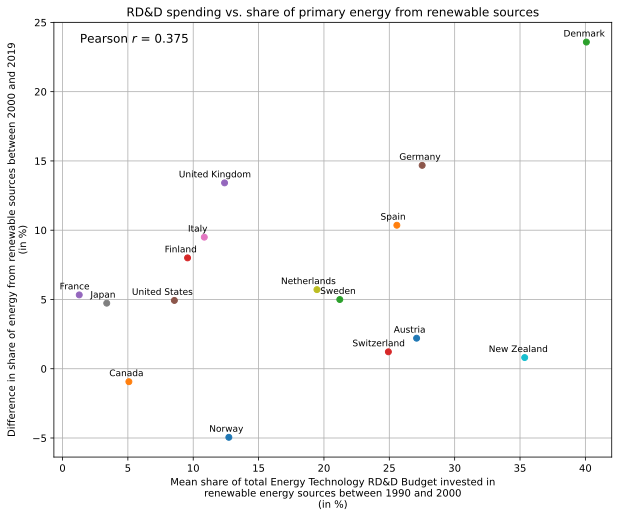

In [10]:
from src.utils.plotting import plot_means_vs_diffs
plot_means_vs_diffs(
    rdd_data,
    1990,
    2000,
    'share_budget_renewables',
    prim_nrg,
    2000,
    2019,
    'prim_nrg_share_renewables',
    title = 'RD&D spending vs. share of primary energy from renewable sources'
)